In [1]:
# 2024-04
# polyhexes (ish) with high Heesch or isohedral number
# cf https://www.polyomino.org.uk/mathematics/polyform-tiling/

In [2]:
from IPython.display import SVG, display
import numpy as np

In [29]:
angles = (
    [-60, 120, -60] * 5 + 
    [-60, 120, 60] + [60, 60, -120] * 5 +
    [60,  60, 30] + [90]
)

dists = (
    [1] + [2] * 3 * 5 + 
    [2, 4] + [2] * 3 * 6 +
    [np.sqrt(3)]
)

In [34]:
angle_lens = [
    2, 4, 4, 3, 3, 3, 1, 3, 3, 4, 3, 3, 2, 3, 3, 4
]

sign = 1
anglesH = []
for angle_len in angle_lens:
    anglesH += [60 * sign] * angle_len
    sign *= -1

distsH = [1] * len(anglesH)

In [30]:
def makepoly(angles, dists):
    
    pt = np.array([0., 0.])
    points = [pt]
    head = 0
    
    for angle, dist in zip(angles, dists):
        angrad = head*2*np.pi/360
        pt = pt + dist * np.array([np.cos(angrad), np.sin(angrad)])
        head += angle
        points.append(pt)
    
    minx = min([pt[0] for pt in points])
    miny = min([pt[1] for pt in points])
    maxx = max([pt[0] for pt in points])
    maxy = max([pt[1] for pt in points])
    
    mysvg = f"""\
    <svg width="200" height="200" viewBox="{minx-1} {miny-1} {maxx-minx+2} {maxy-miny+2}">
    <polyline fill='red' points="{' '.join([f'{pt[0]},{pt[1]}' for pt in points])}"/>
    </svg>"""
    display(SVG(data=mysvg))

    return mysvg

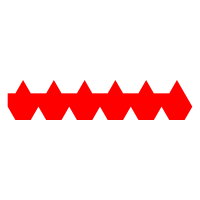

    <svg width="200" height="200" viewBox="-1.0000000000000016 -2.732050807568877 26.0 7.1961524227066365">
    <polyline fill='red' points="0.0,0.0 1.0,0.0 2.0,-1.7320508075688772 3.0,0.0 5.0,0.0 6.0,-1.7320508075688772 7.0,0.0 9.0,0.0 10.0,-1.7320508075688772 11.0,0.0 13.0,0.0 14.0,-1.7320508075688772 15.0,0.0 17.0,0.0 18.0,-1.7320508075688772 19.0,0.0 21.0,0.0 22.0,-1.7320508075688772 24.0,1.7320508075688772 23.0,3.4641016151377544 21.0,3.464101615137755 20.0,1.732050807568878 19.0,3.4641016151377553 17.0,3.4641016151377557 16.0,1.732050807568879 15.0,3.464101615137756 13.0,3.4641016151377566 12.0,1.7320508075688799 11.0,3.464101615137757 9.0,3.4641016151377575 7.999999999999999,1.7320508075688807 7.0,3.464101615137758 5.0,3.4641016151377584 3.999999999999999,1.7320508075688816 2.9999999999999996,3.464101615137759 0.9999999999999996,3.4641016151377593 -1.3322676295501878e-15,1.7320508075688825 -1.6504402011676599e-15,5.329070518200751e-15"/>
    </svg>


In [31]:
print(makepoly(angles, dists))

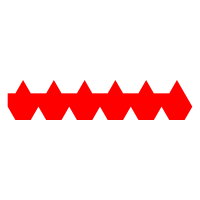

In [35]:
with open(f'/home/adam/Dropbox/personal/projects/ipy/lasers/heesch-six.svg', 'w') as f:
    f.write(makepoly(angles, dists))

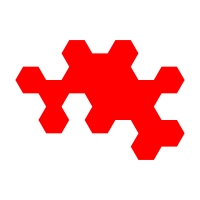

In [37]:
with open(f'/home/adam/Dropbox/personal/projects/ipy/lasers/isohedral-ten.svg', 'w') as f:
    f.write(makepoly(anglesH, distsH))